In [1]:

import os
from copy import deepcopy
import matplotlib.pyplot as plt
%matplotlib inline

import keras.models as models
import keras.layers as layers
import keras.optimizers as optimizers

from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.
/home/gabrijel/anaconda3/envs/machine-learning/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
def plot_history(history):
    history_data        = history.history

    train_accuracy      = history_data['acc']
    train_loss          = history_data['loss']
    validation_accuracy = history_data['val_acc']
    validation_loss     = history_data['val_loss']

    epochs              = range(1, len(history_data['acc']) + 1)

    f, (left, right) = plt.subplots(1, 2)
    f.set_size_inches(16,4)

    left.plot(epochs, train_loss, 'bo', label='Training loss')
    left.plot(epochs, validation_loss, 'b', label='Validation loss')
    left.set_title('Training and validation loss')
    left.set_xlabel('Epochs')
    left.set_ylabel('Loss')
    left.legend()

    right.plot(epochs, train_accuracy, 'bo', label='Training accuracy')
    right.plot(epochs, validation_accuracy, 'b', label='Validation accuracy')
    right.set_title('Training and validation accuracy')
    right.set_xlabel('Epochs')
    right.set_ylabel('Accuracy')
    right.legend()
    
    plt.show()

def plot_accuracy_history(originalModelHistory, otherModelHistory):

    original_validation_loss = originalModelHistory.history['val_loss']
    other_validation_loss    = otherModelHistory.history['val_loss']
    epochs                   = range(1, len(original_validation_loss) + 1)

    f, left = plt.subplots(1, 1)
    f.set_size_inches(12,4)

    left.plot(epochs, original_validation_loss, 'bo', label='Original model validation loss')
    left.plot(epochs, other_validation_loss, 'b', label='Other model validation loss')
    left.set_title('Training and validation loss')
    left.set_xlabel('Epochs')
    left.set_ylabel('Validation loss')
    left.legend()

    plt.show()

In [3]:
augmentationGenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator, validation_generator, test_generator = augmentationGenerator, ImageDataGenerator(rescale=1./255), ImageDataGenerator(rescale=1./255)

train_generator = train_generator.flow_from_directory(
    directory = os.path.join(os.getcwd(), 'datasets/training/train'),
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_generator.flow_from_directory(
    directory = os.path.join(os.getcwd(), 'datasets/training/validation'),
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

test_generator = test_generator.flow_from_directory(
    directory = os.path.join(os.getcwd(), 'datasets/training/test'),
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
baseModel = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)
baseModel.trainable = False

model = models.Sequential()
model.add(baseModel)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer= optimizers.RMSprop(lr=2e-5),
    metrics=['accuracy']
)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [8]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50
)

Epoch 1/100
100/100 [==============================] - 26s 259ms/step - loss: 0.3363 - acc: 0.8460 - val_loss: 0.2440 - val_acc: 0.9020
Epoch 2/100
100/100 [==============================] - 26s 258ms/step - loss: 0.3356 - acc: 0.8580 - val_loss: 0.2428 - val_acc: 0.9050
Epoch 3/100
100/100 [==============================] - 26s 260ms/step - loss: 0.3408 - acc: 0.8540 - val_loss: 0.2413 - val_acc: 0.9020
Epoch 4/100
100/100 [==============================] - 26s 258ms/step - loss: 0.3405 - acc: 0.8445 - val_loss: 0.2471 - val_acc: 0.8960
Epoch 5/100
100/100 [==============================] - 26s 258ms/step - loss: 0.3327 - acc: 0.8555 - val_loss: 0.2480 - val_acc: 0.8980
Epoch 6/100
100/100 [==============================] - 26s 258ms/step - loss: 0.3303 - acc: 0.8550 - val_loss: 0.2474 - val_acc: 0.9030
Epoch 7/100
100/100 [==============================] - 26s 259ms/step - loss: 0.3157 - acc: 0.8605 - val_loss: 0.2434 - val_acc: 0.9010
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 26s 256ms/step - loss: 0.2639 - acc: 0.8920 - val_loss: 0.2467 - val_acc: 0.9050
Epoch 62/100
100/100 [==============================] - 26s 257ms/step - loss: 0.2616 - acc: 0.8910 - val_loss: 0.2504 - val_acc: 0.9050
Epoch 63/100
100/100 [==============================] - 26s 256ms/step - loss: 0.2857 - acc: 0.8805 - val_loss: 0.2461 - val_acc: 0.9050
Epoch 64/100
100/100 [==============================] - 26s 256ms/step - loss: 0.2778 - acc: 0.8820 - val_loss: 0.2469 - val_acc: 0.9020
Epoch 65/100
100/100 [==============================] - 26s 256ms/step - loss: 0.2843 - acc: 0.8765 - val_loss: 0.2473 - val_acc: 0.9040
Epoch 66/100
100/100 [==============================] - 26s 256ms/step - loss: 0.2982 - acc: 0.8725 - val_loss: 0.2466 - val_acc: 0.9010
Epoch 67/100
100/100 [==============================] - 26s 259ms/step - loss: 0.2789 - acc: 0.8810 - val_loss: 0.2479 - val_acc: 0.9040
Epoch 68/100
100/100 [===================

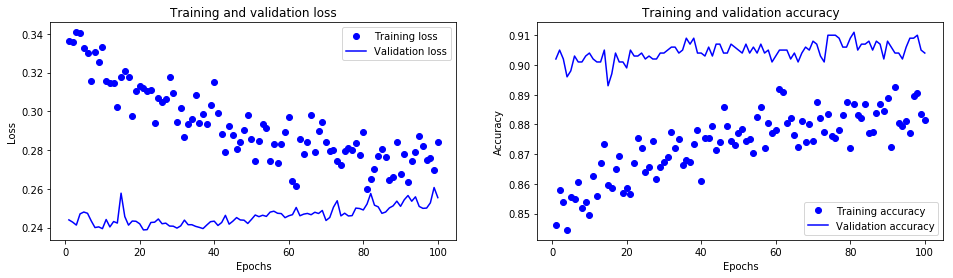

[0.2562726056948304, 0.90399999856948854]


In [9]:
plot_history(history)
print(model.evaluate_generator(test_generator))

In [10]:
model.save('transfer-learning.h5')